# Antes de empezar:

    Lee el archivo README.md
    Comenta todo lo que puedas y utiliza los recursos (archivo README.md)
    ¡Feliz aprendizaje!

En este ejercicio, generaremos números aleatorios a partir de las disribuciones continuas que aprendimos en la lección. Hay dos formas de generar números aleatorios:

1. Usando la librería numpy 
1. Usando la librería Scipy 

Utiliza cualquiera de las dos librerías o ambas en este ejercicio.

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import uniform # Added scipy
import pandas as pd
import numpy as np
import math
import seaborn as sns

## Distribución Uniforme

Para generar números aleatorios uniformes entre dos valores dados usando scipy, podemos usar el siguiente código o el código que hemos
discutido en clase:

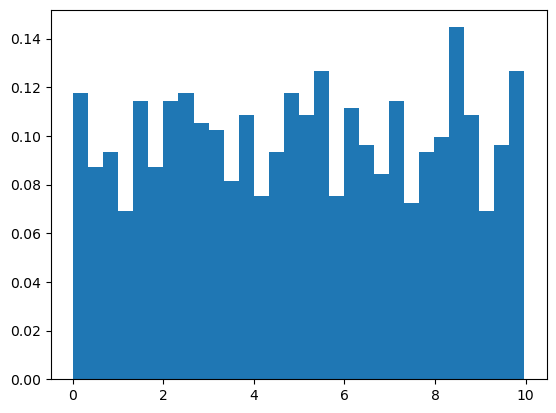

In [32]:
lower_limit = 0  # This is the lower bound
scale = 10 # This is range (upper limit - lower limit)

# Create a uniform distribution
uniform_dist = uniform(loc=lower_limit, scale=scale) #this defines how values behave inside a range of values, it is an object

#uniform_dist is 'waiting' for values

# Generate random samples from the uniform distribution
samples = uniform_dist.rvs(size=1000) #random variates sampling -- choosing size of the uniform sample, it returns a ndarray


plt.hist(samples, bins=30, density=True)
plt.show()

**Tarea:**

1. Basándote en el código anterior, escribe una función que genere números aleatorios uniformemente distribuidos. Hay varios requisitos para tu función:
    * Debe aceptar 3 parámetros: 
        * `bottom` - el límite inferior de los números generados
        * `ceiling` - el límite superior de los números generados
        * `count` - cuántos números generar
    * Debe devolver una matriz de números aleatorios distribuidos uniformemente

2. Llama a tu función con 2 conjuntos de parámetros a continuación:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

3. Traza las distribuciones uniformes generadas anteriormente utilizando histogramas, donde el eje x es el valor y el eje y es el recuento. Que el número de intervalos del histograma sea 10.

El resultado debe ser como el siguiente:

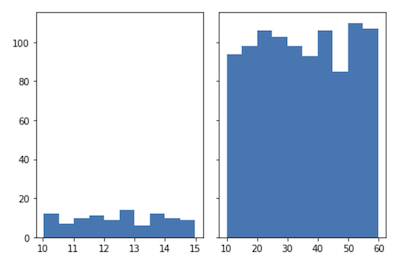

In [34]:
def uniform_distribution(bottom, ceiling, count):
    scale = ceiling - bottom
    uniform_dist = uniform(loc=bottom, scale=scale)
    samples = uniform_dist.rvs(size=count)
    return samples

In [42]:
dist_one = uniform_distribution(bottom = 10, ceiling = 15, count = 100)
dist_two = uniform_distribution(bottom = 10, ceiling = 60, count = 1000)

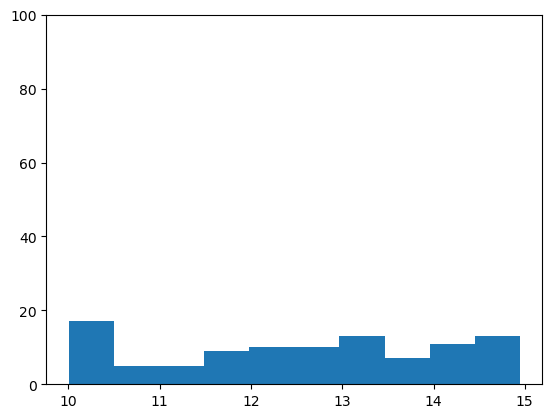

In [67]:
plt.hist(dist_one, bins=10)
plt.ylim(0,100)
plt.show()

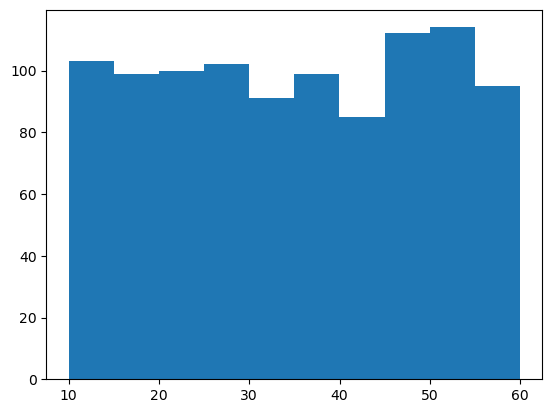

In [52]:
plt.hist(dist_two, bins=10)
plt.show()

How are the two distributions different?

In [71]:
# Both are uniform but first one has a smaller range, turning out in a lower and more disperse histogram
# Second distribution has a larger range turning into a taller histogram

## Distribución Normal

1. De la misma manera en el reto de Distribución Uniforme, escriba una función que genere números aleatorios distribuidos normalmente.
1. Genera 1.000 números distribuidos normalmente con media de 10 y desviación típica de 1
1. Genera 1.000 números distribuidos normalmente con una media de 10 y una desviación típica de 50
2. Representa gráficamente las distribuciones de los datos generados.

Resultado esperado:

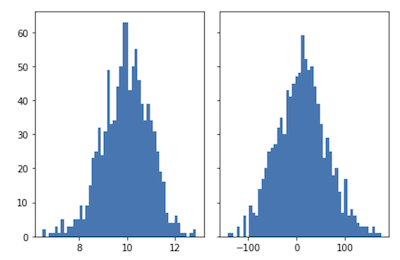

In [81]:
from scipy.stats import norm 

In [83]:
def normal_dist(mu, sigma, size):
    normal_dist = norm(loc = mu, scale = sigma)
    samples = normal_dist.rvs(size = size)
    return samples

In [85]:
normal_one = normal_dist(mu=10, sigma = 1, size = 1000)
normal_two = normal_dist(mu=10, sigma = 50, size = 1000)

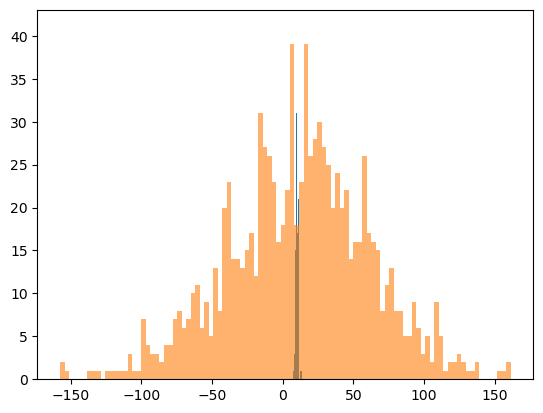

In [97]:
plt.hist(normal_one, bins=100, alpha = 1)
plt.hist(normal_two, bins=100, alpha = 0.6)

plt.show()

How are the two distributions different?

## Distribución Normal de Datos Reales

En este reto vamos a echar un vistazo a los datos reales. Utilizaremos el archivo vehicles.csv para este ejercicio

In [101]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Primero importa vehicles.csv.
A continuación, traza los histogramas de las siguientes variables:

1. Barriles de combustible/año

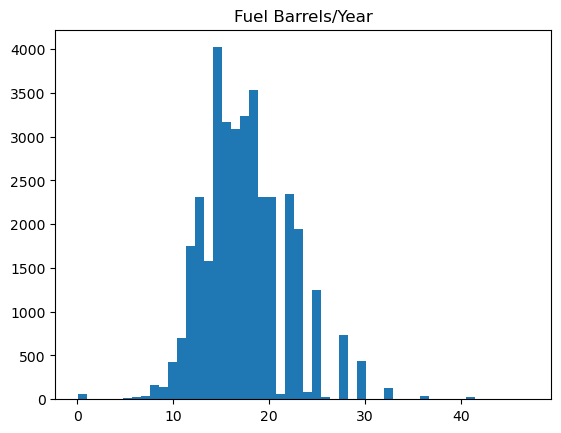

In [109]:
plt.hist(vehicles['Fuel Barrels/Year'], bins=50)
plt.title('Fuel Barrels/Year')
plt.show()

2. Emisiones de CO2 Gramos/Milla 

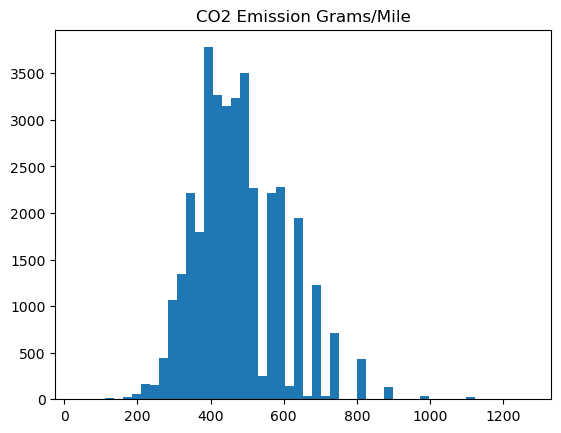

In [111]:
plt.hist(vehicles['CO2 Emission Grams/Mile'], bins=50)
plt.title('CO2 Emission Grams/Mile')
plt.show()

3. MPG combinado

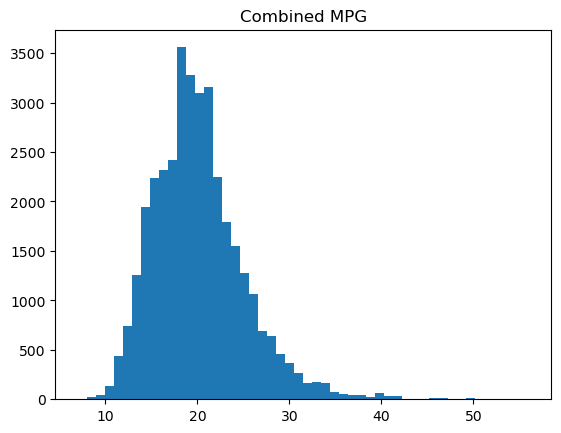

In [113]:
plt.hist(vehicles['Combined MPG'], bins=50)
plt.title('Combined MPG')
plt.show()

¿Cuál o cuáles de las variables tienen una distribución casi normal? ¿Cómo lo sabes?

In [ ]:
# First one: Fuels Barrels/Year looks like it is almost normally distributed but with a slight right skew

In [ ]:
# Second one: CO2 Emissions Grams/Mile also looks like almost normally dist but has some outliers in the right tail 

In [ ]:
# Third one: Combined MPG it is very skewed to the left, doesn't look almost norm dist.

Ninguno de ellos está normalmente ditribuido. 

## Distribución Exponencial

1. Utilizando `numpy.random.exponential`, crea una función que devuelva una lista de números distribuidos exponencialmente con la media de 10. 

1. Utiliza la función para generar dos secuencias de números de tamaño 10 y 100.

1. 2. Traza las distribuciones como histogramas con el número de bins como 100.

El resultado debe ser como el siguiente:

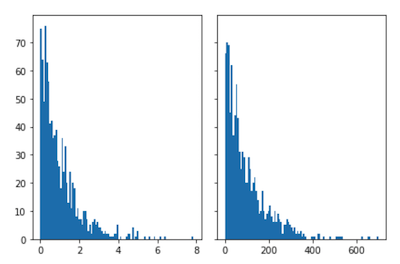

In [115]:
exp_samples = np.random.exponential(scale = 10, size = 100)

In [117]:
# Defining the function

def exp_dist(mean, size):
    scale = mean
    exp_samples = np.random.exponential(scale, size)
    return exp_samples

In [137]:
exp_one = exp_dist(mean = 10, size = 10)
exp_two = exp_dist(mean = 10, size = 100)

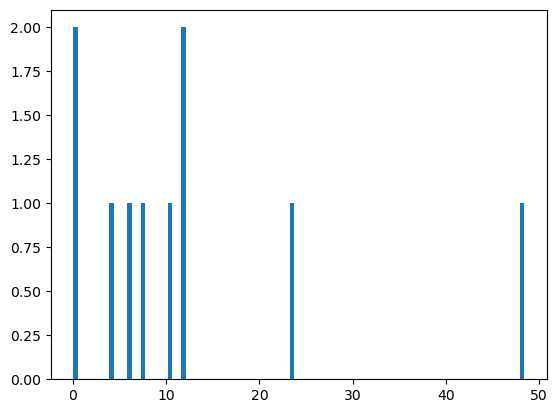

In [141]:
# exp_one
plt.hist(exp_one, bins=100)
plt.show()

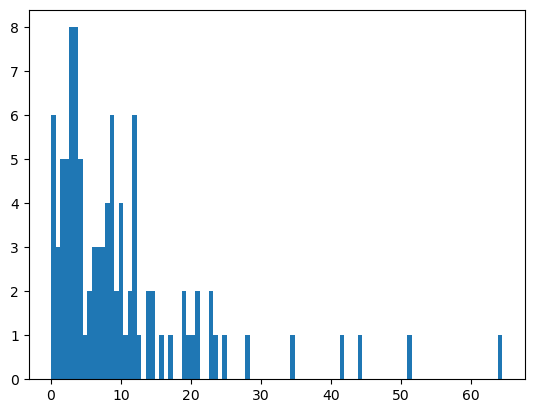

In [143]:
# exp_two
plt.hist(exp_two, bins=100)
plt.show()

¿En qué se diferencian ambas distribuciones?

The main difference between these two distributions is the number of samples. The second has more data, which makes the shape of the distribution smoother and closer to what is expected for an exponential distribution, while the first has a smaller number of samples, which leads to a more irregular and less accurate representation.

If both have the same theoretical mean, the observed differences are mainly due to sample size.


## Distribución Exponencial de datos reales

Supongamos que el tiempo que uno pasa en un banco se distribuye exponencialmente con media de 10 minutos (es decir, λ = 1/10). ¿Cuál es la probabilidad de que un cliente pase menos de quince minutos en el banco? 

Escribe un código en python para resolver este problema

In [150]:
mean = 10
lambda_rate = 1/mean

# Using  CDF to calculate the probability of the time being less than 15 minutes
t = 15  # time we are evaluating

probability = stats.expon.cdf(t, scale=mean)

print(f'the probability is {probability}')

the probability is 0.7768698398515702


¿Cuál es la probabilidad de que el cliente pase más de 15 minutos?

In [152]:
probability

0.7768698398515702